# Scraping 

In [2]:
import nltk
from urllib import request 
global url
global confidence
url = []
confidence = []


url1 = "http://www.natgeotraveller.in/six-years-and-counting/"
html1 = request.urlopen(url1).read().decode('utf8')
#print(html1)
url.append(url1)
confidence.append(0.0)

In [3]:
url2 = "http://www.natgeotraveller.in/train-to-nowhere/"
html2 = request.urlopen(url2).read().decode('utf8')
#print(html2)
url.append(url2)
confidence.append(0.0)

In [4]:
url3 = "http://www.natgeotraveller.in/what-dreams-may-come/"
html3 = request.urlopen(url3).read().decode('utf8')
#print(html3)
url.append(url3)
confidence.append(0.0)

In [5]:
url4 = "http://www.natgeotraveller.in/getting-saucy-about-food/"
html4 = request.urlopen(url4).read().decode('utf8')
#print(html4)
url.append(url4)
confidence.append(0.0)

# Tokenization 

In [6]:
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
raw1 = BeautifulSoup(html1, 'html.parser').get_text()
tokens1 = word_tokenize(raw1)
print(len(tokens1))
#print(tokens1)

952


In [7]:
raw2 = BeautifulSoup(html2, 'html.parser').get_text()
tokens2 = word_tokenize(raw2)
print(len(tokens2))
#print(tokens2)

972


In [8]:
raw3 = BeautifulSoup(html3, 'html.parser').get_text()
tokens3 = word_tokenize(raw3)
print(len(tokens3))
#print(tokens3)

898


In [9]:
raw4 = BeautifulSoup(html4, 'html.parser').get_text()
tokens4 = word_tokenize(raw4)
print(len(tokens4))
#print(tokens4)

999


# Remove Stopwords 

In [31]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
filtered_words1=[]
for w in tokens1:
    if w not in stop_words:
        filtered_words1.append(w)
#print(filtered_words1)

In [32]:
stop_words=set(stopwords.words("english"))
filtered_words2=[]
for w in tokens2:
    if w not in stop_words:
        filtered_words2.append(w)
#print(filtered_words2)

In [33]:
stop_words=set(stopwords.words("english"))
filtered_words3=[]
for w in tokens3:
    if w not in stop_words:
        filtered_words3.append(w)
#print(filtered_words3)

In [34]:
stop_words=set(stopwords.words("english"))
filtered_words4=[]
for w in tokens4:
    if w not in stop_words:
        filtered_words4.append(w)
#print(filtered_words4)

In [14]:
fw = [filtered_words1, filtered_words2, filtered_words3, filtered_words4]

# Parameter - 1 

### In articles, thoughts have to be conveyed with a specific number of words - neither too low for incomplete information delivery nor too high for the user to lose interest

In [16]:
global confidence
i=0
for i in range(0,4):
    if len(fw[i])>=700 and len(fw[i])<750: confidence[i] += 0.2; # 20% confidence
    elif len(fw[i]) in range(600,700) or len(fw[i]) in range(750,800):
        confidence[i] += 0.1;
    print("Total Number of words: ", len(fw[i]))
    print("Confidence: ", round(confidence[i],2))

Total Number of words:  696
Confidence:  0.2
Total Number of words:  723
Confidence:  0.4
Total Number of words:  666
Confidence:  0.2
Total Number of words:  750
Confidence:  0.2


# Parameter - 2 

### Repeating certain words are considered to be bad from an editorial point of view as it signifies the poor vocabulary of the writer

In [17]:
global confidence
for x in range(0,4):
    repeated = [] 
    for i in range(0, len(fw[x])): 
        k = i + 1
        for j in range(k,len(fw[x])): 
            if fw[x][i] == fw[x][j] and fw[x][i] not in repeated: 
                repeated.append(fw[x][i]) 
    print("Number of repeated words: ",len(repeated))
    if len(repeated)<100: confidence[x]+=0.3
    elif len(repeated)<105: confidence[x]+=0.2
    elif len(repeated)<110: confidence[x]+=0.1
    print("Confidence: ",round(confidence[x],2))

Number of repeated words:  107
Confidence:  0.3
Number of repeated words:  109
Confidence:  0.5
Number of repeated words:  104
Confidence:  0.4
Number of repeated words:  110
Confidence:  0.2


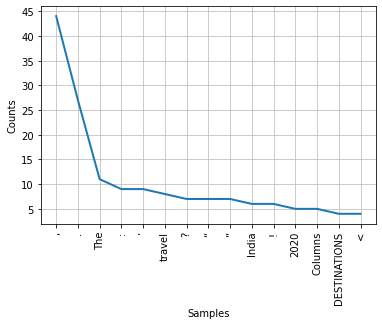

In [18]:
fd = nltk.FreqDist(fw[0])
fd.plot(15, cumulative=False)

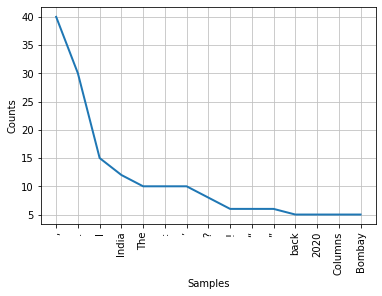

In [19]:
fd = nltk.FreqDist(fw[1])
fd.plot(15, cumulative=False)

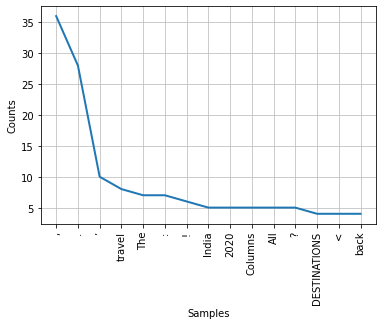

In [20]:
fd = nltk.FreqDist(fw[2])
fd.plot(15, cumulative=False)

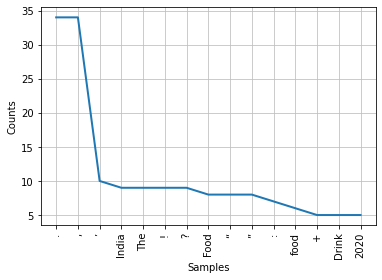

In [21]:
fd = nltk.FreqDist(fw[3])
fd.plot(15, cumulative=False)

# Parameter 3

### Cosine Similarity. For this, we need to consider multiple documents by the same author. Hence this parameter is not applicable for the confidence scores


In [54]:
global confidence
cosine = 0
l1, l2, l3, l4 = [],[],[],[]
total = {w for w in filtered_words1}
total = total.union({w for w in filtered_words2})
total = total.union({w for w in filtered_words3})
total = total.union({w for w in filtered_words4})

for w in total: 
    if w in filtered_words1: 
        l1.append(1) 
    else: 
        l1.append(0) 
    if w in filtered_words2: 
        l2.append(1) 
    else: 
        l2.append(0) 
    if w in filtered_words3: 
        l3.append(1) 
    else: 
        l3.append(0) 
    if w in filtered_words4: 
        l4.append(1) 
    else: 
        l4.append(0) 
c = 0
for i in range(len(total)): 
        c+= l1[i]*l2[i] 
cosine = cosine + (c / float((sum(l1)*sum(l2))**0.5))
c = 0
for i in range(len(total)): 
        c+= l1[i]*l3[i] 
cosine = cosine + (c / float((sum(l1)*sum(l3))**0.5))
c = 0
for i in range(len(total)): 
        c+= l1[i]*l4[i] 
cosine = cosine + (c / float((sum(l1)*sum(l4))**0.5))
c = 0
for i in range(len(total)): 
        c+= l2[i]*l3[i] 
cosine = cosine + (c / float((sum(l2)*sum(l3))**0.5))
c = 0
for i in range(len(total)): 
        c+= l2[i]*l4[i] 
cosine = cosine + (c / float((sum(l2)*sum(l4))**0.5))
c = 0
for i in range(len(total)): 
        c+= l3[i]*l4[i] 
cosine = cosine + (c / float((sum(l3)*sum(l4))**0.5))
print("similarity: ", cosine/6) 

similarity:  0.4361878423864634


# Parameter 4 

### An article can be considered bloated if the number of adjectives are high

In [45]:
from nltk.corpus import wordnet as wn
global confidence
for x in range(0,4):
    adj = [] 
    for i in range(0, len(fw[x])): 
        tmp = wn.synsets(fw[x][i])
        for temp in tmp:
            c = temp.name().split('.')
            #print(c)
            if c[1] == 'a' and fw[x][i] not in adj: 
                adj.append(fw[x][i]) 
    print("Number of Adjectives: ",len(adj))
    diff = len(fw[x])-len(adj)
    print("Difference: ",diff)
    if diff<600: confidence[x]+=0.1
    elif diff<650: confidence[x]+=0.2
    elif diff<700: confidence[x]+=0.3
    print("Confidence: ",round(confidence[x],2))
    print()

Number of Adjectives:  45
Difference:  671
Confidence:  0.6

Number of Adjectives:  62
Difference:  671
Confidence:  0.5

Number of Adjectives:  56
Difference:  630
Confidence:  0.4

Number of Adjectives:  58
Difference:  697
Confidence:  0.4



# Parameter 5

### Number of polysyllables should be within a range where it shouldn't sound complex nor too simple. Here, 4 syllables are set as the parameter

In [46]:
# https://stackoverflow.com/questions/405161/detecting-syllables-in-a-word

a4 = [0,0,0,0]
global confidence
for x in range(0,4):
    for i in range(0, len(fw[x])): 
        theText = fw[x][i]
        cleanText = ""
        for ch in theText:
            if ch in "abcdefghijklmnopqrstuvwxyz'’":
                cleanText += ch
            else:
                cleanText += " "

        asVow    = "aeiouy'’"
        dExep    = ("ei","ie","ua","ia","eo")
        theWords = cleanText.lower().split()
        allSylls = 0
        for inWord in theWords:
            nChar  = len(inWord)
            nSyll  = 0
            wasVow = False
            wasY   = False
            if nChar == 0:
                continue
            if inWord[0] in asVow:
                nSyll += 1
                wasVow = True
                wasY   = inWord[0] == "y"
            for c in range(1,nChar):
                isVow  = False
                if inWord[c] in asVow:
                    nSyll += 1
                    isVow = True
                if isVow and wasVow:
                    nSyll -= 1
                if isVow and wasY:
                    nSyll -= 1
                if inWord[c:c+2] in dExep:
                    nSyll += 1
                wasVow = isVow
                wasY   = inWord[c] == "y"
            if inWord.endswith(("e")):
                nSyll -= 1
            if inWord.endswith(("le","ea","io")):
                nSyll += 1
            if nSyll < 1:
                nSyll = 1
            # print("%-15s: %d" % (inWord,nSyll))
            if(nSyll>3): a4[x]+=1
    print(a4[x])

37
29
45
41


In [47]:
global confidence
for x1 in range(0,4):
    print(a4[x1])
    if a4[x1] in range(25,35): confidence[x1]+=0.3
    elif a4[x1] in range(15,25): confidence[x1]+=0.2
    elif a4[x1] in range(35,45): confidence[x1]+=0.2
    print("Confidence: ",round(confidence[x1],2))

37
Confidence:  0.8
29
Confidence:  0.8
45
Confidence:  0.4
41
Confidence:  0.6


# Parameter 6

### Number of words should be within a range where it shouldn't sound complex nor too simple

In [ ]:
# Saurav

# Parameter 7

### Readability index - Check up on this

In [97]:
# Idea from: https://medium.com/glose-team/how-to-evaluate-text-readability-with-nlp-9c04bd3f46a2
# https://www.geeksforgeeks.org/readability-index-pythonnlp/

# Parameter 8

### Number of delimiters 

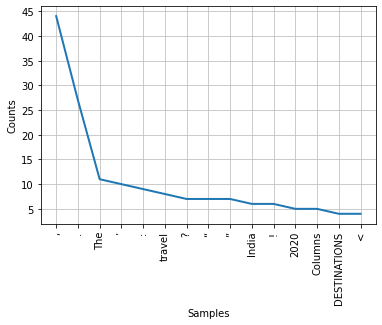

Confidence:  1.1


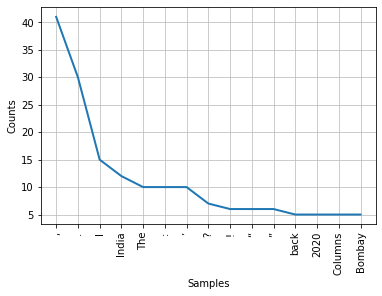

Confidence:  1.1


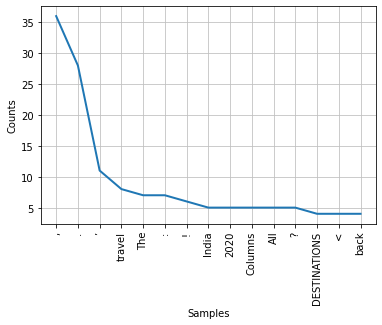

Confidence:  0.6


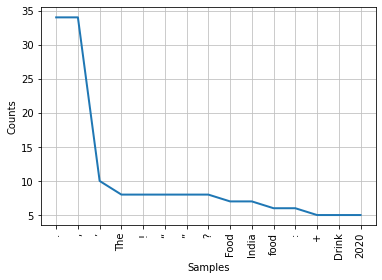

Confidence:  0.8


In [62]:
global confidence
for x in range(0,4):
    fd = nltk.FreqDist(fw[x])
    fd.plot(15, cumulative=False)
    a = dict([(m, n) for m, n in fd.items()])
    if a[','] in range(40,50): confidence[x]+=0.3
    elif a[','] in range(30,40): confidence[x]+=0.2
    elif a[','] in range(50,60): confidence[x]+=0.2
    print("Confidence: ",round(confidence[x],2))

# Run this for resetting the confidence scores

In [117]:
global confidence
for i in range(len(confidence)):
    confidence[i]=0
print(confidence)

[0, 0, 0, 0]


# Calculating confidences 

### All the scores which are cumulated till now are checked against a minimum threshold score

In [63]:
global confidence
for i in range(0,4):
    if confidence[i]>=1:
        print("Author of article", i+1, "is hired")
        print("Article ",i+1,":",url[i])

Author of article 1 is hired
Article  1 : http://www.natgeotraveller.in/six-years-and-counting/
Author of article 2 is hired
Article  2 : http://www.natgeotraveller.in/train-to-nowhere/
